# ASTR3800 Final Project
### Thor Breece

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from astropy import units as u
from astropy import constants as co
import linear_least_squares as lsq
from scipy.stats import pearsonr

## 2 Event Demographics

In [2]:
ligo = pd.read_csv("LIGO.csv")

The circled data point in the below plot represents the maximum redshift in the given dataset. 
Finding this data point within the data we find that the redshift limit is 1.18


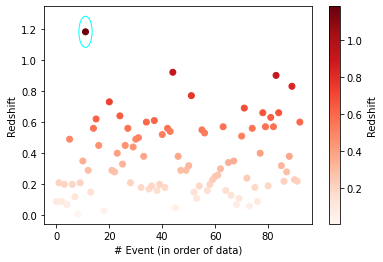

In [3]:
# 1.

event_arr = np.linspace(0,92,93)
plt.scatter(event_arr, ligo["redshift"], c=ligo["redshift"], cmap="Reds")
cbar = plt.colorbar()
cbar.set_label("Redshift")
plt.xlabel("# Event (in order of data)")
plt.ylabel("Redshift")

fig = plt.gcf()
ax = fig.gca()
e = Ellipse((ligo["redshift"].argmax(), ligo["redshift"].max()), 5, 0.2, fc='None', ec='cyan')
ax.add_patch(e)
print(f'The circled data point in the below plot represents the maximum redshift in the given dataset. \nFinding this data point within the data we find that the redshift limit is {ligo["redshift"].max()}' )


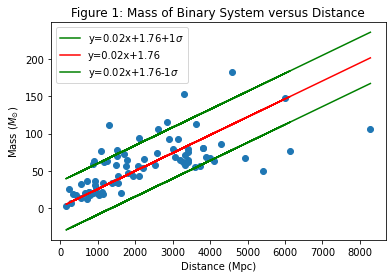

In [4]:
# 2.
ligo = ligo[ligo['luminosity_distance'].notna()]
ligo = ligo[ligo['total_mass_source'].notna()]
plt.scatter(ligo["luminosity_distance"], ligo["total_mass_source"])
plt.xlabel("Distance (Mpc)")
plt.ylabel(r"Mass ($M_{\odot}$)");
uslope = lsq.m_wtd(ligo['luminosity_distance'], ligo['total_mass_source'], ligo['total_mass_source_upper'])
uintercept = lsq.b_wtd(ligo['luminosity_distance'], ligo['total_mass_source'], ligo['total_mass_source_upper'])
model = uslope * ligo["luminosity_distance"] + uintercept
div = ligo["total_mass_source"].std()
plt.plot(ligo["luminosity_distance"], model+div, color="g", label=f'y={uslope:.2f}x+{uintercept:.2f}+$1\sigma$')
plt.plot(ligo["luminosity_distance"], model, color="r", label=f'y={uslope:.2f}x+{uintercept:.2f}')
plt.plot(ligo["luminosity_distance"], model-div, color="g", label=f'y={uslope:.2f}x+{uintercept:.2f}-$1\sigma$')
plt.title("Figure 1: Mass of Binary System versus Distance")
plt.legend()

Text(0.5, 1.0, 'Figure 2: Residuals of mass data')

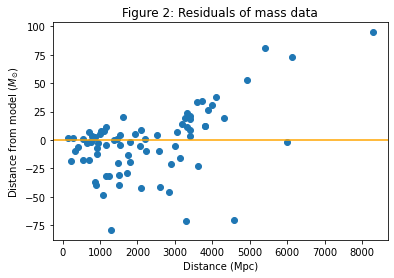

In [5]:
resid = model - ligo["total_mass_source"]

plt.scatter(ligo["luminosity_distance"], resid)
plt.axhline(y=0, c='orange')
plt.xlabel("Distance (Mpc)")
plt.ylabel(r"Distance from model ($M_{\odot}$)")
plt.title("Figure 2: Residuals of mass data")

In [6]:
# from tutorial 08
def cov(x, y):
    N = len(x)
    mean_x = np.average(x)
    mean_y = np.average(y)
    return (1/N)*(np.sum((x - mean_x) * (y - mean_y)))
def cor(x,y):
    mean_x = np.average(x)
    mean_y = np.average(y)
    numerator = np.sum((x - mean_x)*(y-mean_y))
    denominator = np.sqrt(np.sum((x-mean_x)**2) * np.sum((y-mean_y)**2))
    return numerator / denominator
print(f'The covariance statistic between Mass and Distance is {cov(ligo["total_mass_source"],ligo["luminosity_distance"]):.2f} and the correlation coefficient is {cor(ligo["total_mass_source"],ligo["luminosity_distance"]):.2f}')
r, p = pearsonr(ligo["total_mass_source"],ligo["luminosity_distance"])
print(f'The probability of the correlation coefficient found in Mass and Distance being found in uncorrelated data is p = {p:.2g}. So it is highly likely that the two are correlated')

The covariance statistic between Mass and Distance is 35672.91 and the correlation coefficient is 0.67
The probability of the correlation coefficient found in Mass and Distance being found in uncorrelated data is p = 1.9e-11%. So it is highly likely that the two are correlated


The AMOUNT of mass that is converted into gravitational waves is the difference between the total mass and the final mass. 
The mass fraction that is converted to GWs will be 1 - (total mass / final mass). 
The average fraction of mass converted to GWs is 0.043 and the spread, or standard deviation in this fraction is 0.01035.


Text(0.5, 1.0, 'Energy Released from each Merger Event')

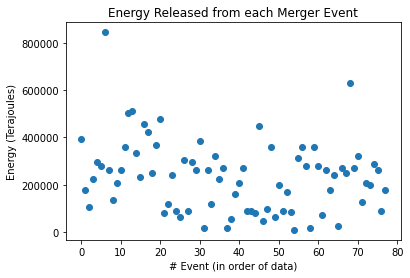

In [49]:
# 3.
ligo = ligo[ligo["total_mass_source"].notna()]
ligo = ligo[ligo["final_mass_source"].notna()]
massToGW = ligo["total_mass_source"] - ligo['final_mass_source']
mass_frac = 1 - (ligo["final_mass_source"] /ligo["total_mass_source"])
mass_delta = list(ligo["total_mass_source"] - ligo["final_mass_source"])
mass_frac_avg = np.average(mass_frac)
mass_frac_std = np.std(mass_frac)
print(f'The AMOUNT of mass that is converted into gravitational waves is the difference between the total mass and the final mass. \nThe mass fraction that is converted to GWs will be 1 - (total mass / final mass). \nThe average fraction of mass converted to GWs is {mass_frac_avg:.3f} and the spread, or standard deviation in this fraction is {mass_frac_std:.5f}.')
E = mass_delta * co.c ** 2 * u.kg
event_arr = np.linspace(0,len(ligo["final_mass_source"]) - 1, len(ligo['final_mass_source']))
plt.scatter(event_arr, E.to(u.TJ))
plt.xlabel("# Event (in order of data)")
plt.ylabel("Energy (Terajoules)")
plt.title("Energy Released from each Merger Event")

from tutorial 12 part 1.9 we get a inband peak duration which I will be using as the assumption for the caluclation of GW luminosity
1.2970190335899821e+22


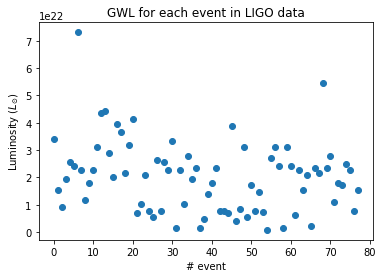

In [60]:
# 4.
m_tot = ligo["total_mass_source"].to_numpy()
m_fin = ligo["final_mass_source"].to_numpy()
dM = (m_tot - m_fin) * u.M_sun
E = dM * co.c ** 2
E = [i.decompose() for i in E]
duration = 0.06 * u.second
gwL = [(i / duration).to('L_sun') for i in E]

gwL_plotting = [i.value for i in gwL]
print("from tutorial 12 part 1.9 we get a inband peak duration which I will be using as the assumption for the caluclation of GW luminosity")
plt.scatter(range(len(gwL)), gwL_plotting)
plt.title("GWL for each event in LIGO data")
plt.xlabel("# event")
plt.ylabel(r"Luminosity ($L_{\odot}$)");
print(np.array(gwL_plotting).std())

[<Quantity 3.42355109e+22 solLum>,
 <Quantity 1.55615959e+22 solLum>,
 <Quantity 9.33695752e+21 solLum>,
 <Quantity 1.94519948e+22 solLum>,
 <Quantity 2.56766332e+22 solLum>,
 <Quantity 2.41204736e+22 solLum>,
 <Quantity 7.31395005e+22 solLum>,
 <Quantity 2.2564314e+22 solLum>,
 <Quantity 1.16711969e+22 solLum>,
 <Quantity 1.78958352e+22 solLum>,
 <Quantity 2.2564314e+22 solLum>,
 <Quantity 3.11231917e+22 solLum>,
 <Quantity 4.35724684e+22 solLum>,
 <Quantity 4.43505482e+22 solLum>,
 <Quantity 2.87889523e+22 solLum>,
 <Quantity 2.02300746e+22 solLum>,
 <Quantity 3.96820694e+22 solLum>,
 <Quantity 3.65697503e+22 solLum>,
 <Quantity 2.17862342e+22 solLum>,
 <Quantity 3.19012715e+22 solLum>,
 <Quantity 4.1238229e+22 solLum>,
 <Quantity 7.00271814e+21 solLum>,
 <Quantity 1.01150373e+22 solLum>,
 <Quantity 2.10081544e+22 solLum>,
 <Quantity 7.78079793e+21 solLum>,
 <Quantity 5.44655855e+21 solLum>,
 <Quantity 2.6454713e+22 solLum>,
 <Quantity 7.78079793e+21 solLum>,
 <Quantity 2.56766332e+2

The distribution isn't easily figured out from plotting mass 1 vs mass 2


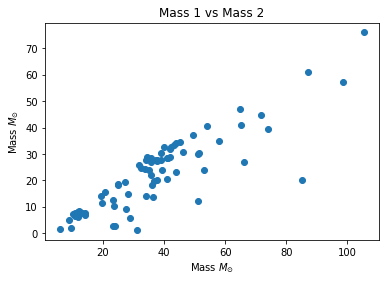

In [9]:
# 5.
plt.scatter(ligo["mass_1_source"], ligo["mass_2_source"])
plt.title("Mass 1 vs Mass 2")
plt.xlabel(r'Mass $M_{\odot}$')
plt.ylabel(r'Mass $M_{\odot}$')
print("The distribution isn't easily figured out from plotting mass 1 vs mass 2")

The minimum binary mass ratio is 1.19 and the maximum binary mass ratio is 26.58


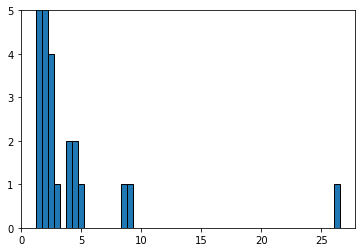

In [61]:

b_mass_r = ligo["mass_1_source"] / ligo["mass_2_source"]
plt.hist(b_mass_r, bins=50,edgecolor='black')
# plt.ylim(0,5)
print(f'The minimum binary mass ratio is {b_mass_r.min():.2f} and the maximum binary mass ratio is {b_mass_r.max():.2f}')

### 3 Standrard Sirens

In [63]:
ligo = pd.read_csv("LIGO.csv")




In [64]:
# 1.
GW170817 = ligo.loc[ligo["commonName"] == "GW170817"]
dl = float(GW170817["luminosity_distance"].to_string(index=False))
ldu = float(GW170817["luminosity_distance_upper"].to_string(index=False))
ldl = float(GW170817["luminosity_distance_lower"].to_string(index=False))
print(f'The luminosity distance of this merger is {dl} Mpc with an uncertainty of + {ldu} and {ldl} Mpc.')

The luminosity distance of this merger is 40.0 Mpc with an uncertainty of + 7.0 and -15.0 Mpc.


2.
Using the equation 
$$
cz = H_0D_L \\
\text{we solve for} H_0 \\
H_0 = \frac{cz}{D_L} \\
\text{plugging in the equation for redshift: } z = \frac{v}{c} \\
H_0 = \frac{v}{D_L} 
$$

In [65]:
v = 3017

H_0 = v / dl
print(f'The Hubble Constant as calculated via this merger is {H_0:.2f} km/s/mpc ')

The Hubble Constant as calculated via this merger is 75.42 km/s/mpc 


3.
For the uncertainty: 
$$
\begin{align*}
\sigma_{H_0} = \sqrt{(\frac{\partial}{\partial v}\frac{v}{D_L})^{2}\sigma_{v}^2 + (\frac{\partial}{\partial D_L}\frac{v}{D_L})^{2}\sigma_{D_L}^2 } \\
= \sqrt{(\frac{1}{D_L})^2 \sigma_{v}^2 + (\frac{-v}{(D_L)^2})^2 \sigma_{D_L}^2} \\
 \sigma_{H_0} = \sqrt{(D_L)^{-2}\sigma_{v}^2 + \frac{v^{2}}{(D_L)^4}\sigma_{D_L}^2} \\
\end{align*} 
$$

In [14]:
sig_v = 166
sigma_H_u = np.sqrt(dl**-2 * sig_v**2 + (3017**2 / (dl)**4) * ldu ** 2)
sigma_H_l = np.sqrt(dl**-2 * sig_v**2 + (3017**2 / (dl)**4) * ldl ** 2)
sigma_H_a = np.sqrt(dl**-2 * sig_v**2 + (3017**2 / (dl)**4) * 11 ** 2)
print(sigma_H_u)
print(sigma_H_l)
print(sigma_H_a)

13.836401280341105
28.587206389233366
21.152963823436778


### 4 Own Exploration

In [15]:
cols = list(ligo.columns)
ligo.fillna(0, inplace=True)


In [16]:
# RUN THIS CELL ONLY ONCE
# Once Columns are dropped they stay dropped
quant = ligo

quant.drop(['id', 'commonName', 'version', 'catalog.shortName', 'GPS', 'reference', 'jsonurl'], axis = 1, inplace=True)
cols = list(quant.columns)

In [66]:
corrr = quant.corr()
droppable = ["chirp_mass", "chirp_mass_lower", "chirp_mass_upper", "far_lower", "far_upper", "p_astro_upper", "p_astro_lower"]
corr = corrr.drop(droppable, axis = 1)

cor = corr.dropna()
print(f"Due to NaN occuring in a fair number of the upper and lower bounds on some variables, \nThese {droppable} \nwere dropped from the correlation matrix")
cor.to_html()

Due to NaN occuring in a fair number of the upper and lower bounds on some variables, 
These ['chirp_mass', 'chirp_mass_lower', 'chirp_mass_upper', 'far_lower', 'far_upper', 'p_astro_upper', 'p_astro_lower'] 
were dropped from the correlation matrix


'|                                  |   mass_1_source |   mass_1_source_lower |   mass_1_source_upper |   mass_2_source |   mass_2_source_lower |   mass_2_source_upper |   network_matched_filter_snr |   network_matched_filter_snr_lower |   network_matched_filter_snr_upper |   luminosity_distance |   luminosity_distance_lower |   luminosity_distance_upper |     chi_eff |   chi_eff_lower |   chi_eff_upper |   total_mass_source |   total_mass_source_lower |   total_mass_source_upper |   chirp_mass_source |   chirp_mass_source_lower |   chirp_mass_source_upper |   redshift |   redshift_lower |   redshift_upper |        far |     p_astro |   final_mass_source |   final_mass_source_lower |   final_mass_source_upper |\n|:---------------------------------|----------------:|----------------------:|----------------------:|----------------:|----------------------:|----------------------:|-----------------------------:|-----------------------------------:|-----------------------------------:|-----

As some of these correlations don't have the information needed to provide an accurate correlation coefficient I dropped them from this correlation matrix table.

In [18]:
cor
cols = list(cor.columns)

In [19]:
pearsonDict = {}
for i in cols:
    temp = {}
    for j in cols:
        r, temp[j] = pearsonr(cor[i], cor[j])
    pearsonDict[i] = temp        

pearsonDf = pd.DataFrame.from_dict(pearsonDict)

pearsonDf

,mass_1_source,mass_1_source_lower,mass_1_source_upper,mass_2_source,mass_2_source_lower,mass_2_source_upper,network_matched_filter_snr,network_matched_filter_snr_lower,network_matched_filter_snr_upper,luminosity_distance,...,chirp_mass_source_lower,chirp_mass_source_upper,redshift,redshift_lower,redshift_upper,far,p_astro,final_mass_source,final_mass_source_lower,final_mass_source_upper
mass_1_source,0.000000e+00,2.952065e-17,1.246870e-11,7.681062e-21,7.144420e-31,1.413249e-25,2.186359e-05,2.249948e-06,3.867973e-06,3.136846e-16,...,1.630534e-33,2.890195e-22,1.037333e-16,3.820235e-16,2.758241e-13,1.549977e-02,0.229203,3.508650e-34,1.231781e-18,3.806204e-13
mass_1_source_lower,2.952065e-17,0.000000e+00,8.094217e-21,3.753804e-11,2.104759e-15,3.659050e-23,1.609188e-08,1.434990e-10,2.236819e-10,1.007265e-22,...,1.168080e-18,6.214730e-26,6.433552e-23,1.256152e-23,2.525131e-24,3.388679e-04,0.025754,5.845433e-15,6.873241e-34,5.157248e-24
mass_1_source_upper,1.246870e-11,8.094217e-21,0.000000e+00,6.090546e-08,8.245046e-11,2.044474e-14,1.111211e-09,4.955593e-13,7.658591e-14,2.675472e-15,...,1.565564e-12,5.386165e-16,2.843388e-15,6.506532e-16,5.066937e-20,3.434831e-05,0.007280,2.408078e-10,4.748794e-19,4.057670e-34
mass_2_source,7.681062e-21,3.753804e-11,6.090546e-08,9.704894e-205,1.989998e-23,1.815141e-15,9.768584e-04,2.682206e-04,3.905596e-04,5.153927e-11,...,6.039683e-19,4.198612e-14,2.524420e-11,6.254192e-11,5.890683e-09,9.998037e-02,0.629649,2.892281e-25,4.349177e-12,6.051949e-09
mass_2_source_lower,7.144420e-31,2.104759e-15,8.245046e-11,1.989998e-23,0.000000e+00,1.468906e-22,4.244728e-05,7.840119e-06,1.101391e-05,1.822501e-14,...,8.853396e-31,2.491595e-20,6.805960e-15,1.705361e-14,3.917765e-12,2.002270e-02,0.251361,2.699745e-34,5.957291e-17,3.324090e-12
mass_2_source_upper,1.413249e-25,3.659050e-23,2.044474e-14,1.815141e-15,1.468906e-22,0.000000e+00,7.123515e-07,5.496295e-08,9.464447e-08,4.631302e-21,...,1.367952e-29,3.959121e-36,1.053057e-21,2.388793e-21,9.751849e-18,2.338337e-03,0.078791,1.343855e-21,2.689311e-26,2.233381e-16
network_matched_filter_snr,2.186359e-05,1.609188e-08,1.111211e-09,9.768584e-04,4.244728e-05,7.123515e-07,7.230709e-213,1.293376e-14,2.120415e-12,6.127532e-09,...,6.699207e-06,2.374753e-07,7.580384e-09,3.771030e-09,1.348714e-10,1.020624e-06,0.000120,7.768916e-05,3.594926e-08,3.101063e-09
network_matched_filter_snr_lower,2.249948e-06,1.434990e-10,4.955593e-13,2.682206e-04,7.840119e-06,5.496295e-08,1.293376e-14,0.000000e+00,3.142143e-23,6.673105e-10,...,9.163638e-07,1.254976e-08,7.625626e-10,3.406929e-10,6.956260e-13,1.090325e-07,0.001586,1.138962e-05,5.878885e-10,4.883177e-12
network_matched_filter_snr_upper,3.867973e-06,2.236819e-10,7.658591e-14,3.905596e-04,1.101391e-05,9.464447e-08,2.120415e-12,3.142143e-23,1.973676e-203,4.185701e-09,...,1.460744e-06,1.750544e-08,4.807895e-09,1.917457e-09,1.711595e-12,2.387652e-09,0.000676,1.816268e-05,7.041197e-10,1.951242e-12
luminosity_distance,3.136846e-16,1.007265e-22,2.675472e-15,5.153927e-11,1.822501e-14,4.631302e-21,6.127532e-09,6.673105e-10,4.185701e-09,0.000000e+00,...,2.752652e-17,1.222944e-21,1.270112e-47,1.966139e-44,4.372988e-23,7.437117e-04,0.033895,2.275263e-14,4.024662e-22,7.227964e-17


The first thing I noticed based on the pearsonR matrix is that the correlation coefficients of upper and lower bounds in reference to the variables they are bounded on are highly unlikely to be found in uncorrelated data. This is a pretty obvious and expected result. To find more nuanced and hidden correlations I am goign to narrow down this matrix to only correlatiosn with a pearsonr probability of less than 0.05.  

In [20]:
def onlySignificant(pearson, thresh):
    col = pearson.columns
    goodPearson = {}
    for i in col:
        temp = {}
        for j in col:
            if pearson[i][j] <= thresh:
                temp[j] = pearson[i][j]
        goodPearson[i] = temp
    return goodPearson
gP = onlySignificant(pearsonDf, 0.05)

gPdf = pd.DataFrame.from_dict(gP)
gPdf

,mass_1_source,mass_1_source_lower,mass_1_source_upper,mass_2_source,mass_2_source_lower,mass_2_source_upper,network_matched_filter_snr,network_matched_filter_snr_lower,network_matched_filter_snr_upper,luminosity_distance,...,chirp_mass_source_lower,chirp_mass_source_upper,redshift,redshift_lower,redshift_upper,far,p_astro,final_mass_source,final_mass_source_lower,final_mass_source_upper
mass_1_source,0.000000e+00,2.952065e-17,1.246870e-11,7.681062e-21,7.144420e-31,1.413249e-25,2.186359e-05,2.249948e-06,3.867973e-06,3.136846e-16,...,1.630534e-33,2.890195e-22,1.037333e-16,3.820235e-16,2.758241e-13,1.549977e-02,NaN,3.508650e-34,1.231781e-18,3.806204e-13
mass_1_source_lower,2.952065e-17,0.000000e+00,8.094217e-21,3.753804e-11,2.104759e-15,3.659050e-23,1.609188e-08,1.434990e-10,2.236819e-10,1.007265e-22,...,1.168080e-18,6.214730e-26,6.433552e-23,1.256152e-23,2.525131e-24,3.388679e-04,0.025754,5.845433e-15,6.873241e-34,5.157248e-24
mass_1_source_upper,1.246870e-11,8.094217e-21,0.000000e+00,6.090546e-08,8.245046e-11,2.044474e-14,1.111211e-09,4.955593e-13,7.658591e-14,2.675472e-15,...,1.565564e-12,5.386165e-16,2.843388e-15,6.506532e-16,5.066937e-20,3.434831e-05,0.007280,2.408078e-10,4.748794e-19,4.057670e-34
mass_2_source,7.681062e-21,3.753804e-11,6.090546e-08,9.704894e-205,1.989998e-23,1.815141e-15,9.768584e-04,2.682206e-04,3.905596e-04,5.153927e-11,...,6.039683e-19,4.198612e-14,2.524420e-11,6.254192e-11,5.890683e-09,NaN,NaN,2.892281e-25,4.349177e-12,6.051949e-09
mass_2_source_lower,7.144420e-31,2.104759e-15,8.245046e-11,1.989998e-23,0.000000e+00,1.468906e-22,4.244728e-05,7.840119e-06,1.101391e-05,1.822501e-14,...,8.853396e-31,2.491595e-20,6.805960e-15,1.705361e-14,3.917765e-12,2.002270e-02,NaN,2.699745e-34,5.957291e-17,3.324090e-12
mass_2_source_upper,1.413249e-25,3.659050e-23,2.044474e-14,1.815141e-15,1.468906e-22,0.000000e+00,7.123515e-07,5.496295e-08,9.464447e-08,4.631302e-21,...,1.367952e-29,3.959121e-36,1.053057e-21,2.388793e-21,9.751849e-18,2.338337e-03,NaN,1.343855e-21,2.689311e-26,2.233381e-16
network_matched_filter_snr,2.186359e-05,1.609188e-08,1.111211e-09,9.768584e-04,4.244728e-05,7.123515e-07,7.230709e-213,1.293376e-14,2.120415e-12,6.127532e-09,...,6.699207e-06,2.374753e-07,7.580384e-09,3.771030e-09,1.348714e-10,1.020624e-06,0.000120,7.768916e-05,3.594926e-08,3.101063e-09
network_matched_filter_snr_lower,2.249948e-06,1.434990e-10,4.955593e-13,2.682206e-04,7.840119e-06,5.496295e-08,1.293376e-14,0.000000e+00,3.142143e-23,6.673105e-10,...,9.163638e-07,1.254976e-08,7.625626e-10,3.406929e-10,6.956260e-13,1.090325e-07,0.001586,1.138962e-05,5.878885e-10,4.883177e-12
network_matched_filter_snr_upper,3.867973e-06,2.236819e-10,7.658591e-14,3.905596e-04,1.101391e-05,9.464447e-08,2.120415e-12,3.142143e-23,1.973676e-203,4.185701e-09,...,1.460744e-06,1.750544e-08,4.807895e-09,1.917457e-09,1.711595e-12,2.387652e-09,0.000676,1.816268e-05,7.041197e-10,1.951242e-12
luminosity_distance,3.136846e-16,1.007265e-22,2.675472e-15,5.153927e-11,1.822501e-14,4.631302e-21,6.127532e-09,6.673105e-10,4.185701e-09,0.000000e+00,...,2.752652e-17,1.222944e-21,1.270112e-47,1.966139e-44,4.372988e-23,7.437117e-04,0.033895,2.275263e-14,4.024662e-22,7.227964e-17


After the first threshhold the majority were still statistically significant so I am going to lower the threshhold even further. Also, as the correlation is obvious, I am going to drop the uncertainty values as well.

In [21]:
gP = onlySignificant(pearsonDf, 0.001)
droppable = ['mass_1_source_lower', 'mass_1_source_upper',
       'mass_2_source_lower', 'mass_2_source_upper','network_matched_filter_snr_lower',
       'network_matched_filter_snr_upper','luminosity_distance_lower', 'luminosity_distance_upper',
       'chi_eff_lower', 'chi_eff_upper','total_mass_source_lower', 'total_mass_source_upper',
       'chirp_mass_source_lower','chirp_mass_source_upper', 'redshift_lower',
       'redshift_upper','final_mass_source_lower', 'final_mass_source_upper']
gPdf = pd.DataFrame.from_dict(gP)
revised = gPdf.drop(droppable, axis = 1)
final = revised.drop(droppable, axis = 0)
final

,mass_1_source,mass_2_source,network_matched_filter_snr,luminosity_distance,chi_eff,total_mass_source,chirp_mass_source,redshift,far,p_astro,final_mass_source
mass_1_source,0.000000e+00,7.681062e-21,2.186359e-05,3.136846e-16,4.601379e-05,7.722088e-33,5.192259e-26,1.037333e-16,NaN,NaN,3.508650e-34
mass_2_source,7.681062e-21,9.704894e-205,9.768584e-04,5.153927e-11,NaN,5.230305e-20,1.031650e-32,2.524420e-11,NaN,NaN,2.892281e-25
network_matched_filter_snr,2.186359e-05,9.768584e-04,7.230709e-213,6.127532e-09,1.249804e-06,1.569187e-05,2.758899e-04,7.580384e-09,0.000001,0.00012,7.768916e-05
luminosity_distance,3.136846e-16,5.153927e-11,6.127532e-09,0.000000e+00,1.048579e-07,2.615198e-16,1.095267e-12,1.270112e-47,0.000744,NaN,2.275263e-14
chi_eff,4.601379e-05,NaN,1.249804e-06,1.048579e-07,8.376948e-209,6.785248e-05,4.835460e-04,1.754188e-07,0.000551,NaN,1.643364e-04
total_mass_source,7.722088e-33,5.230305e-20,1.569187e-05,2.615198e-16,6.785248e-05,7.230709e-213,3.810319e-24,8.232555e-17,NaN,NaN,2.296272e-29
chirp_mass_source,5.192259e-26,1.031650e-32,2.758899e-04,1.095267e-12,4.835460e-04,3.810319e-24,0.000000e+00,4.763282e-13,NaN,NaN,8.649392e-34
redshift,1.037333e-16,2.524420e-11,7.580384e-09,1.270112e-47,1.754188e-07,8.232555e-17,4.763282e-13,0.000000e+00,0.000837,NaN,8.579264e-15
final_mass_source,3.508650e-34,2.892281e-25,7.768916e-05,2.275263e-14,1.643364e-04,2.296272e-29,8.649392e-34,8.579264e-15,NaN,NaN,0.000000e+00
far,NaN,NaN,1.020624e-06,7.437117e-04,5.514387e-04,NaN,NaN,8.366689e-04,0.000000,0.00001,NaN


At this threshhold only strong correlations are present, before I reduce the threshhold even further, I noticed that p_astro (probabiltiy of astrophysical origin) is only strongly correlated with far ($yr^{-1}$) and network_matched_filter_snr (signal to nosie ratio). After reading a protion of the report associated with this data, p_astro was a threshhold probability used in the search algorithm looking for potentional gravitational wave signals. This was used in conjunction with the FAR and the SNR to narrow down the search of candidates. 

I also noticed that an objects $\chi_{eff}$, or it's effective spin, is mroe dependent on mass 1 than mas 2 as it is more storngly correlated with mass 1. While this is due largely to the conventio nof mass 1 being the larger of the two objects in the system, it still shows that effective spin is effected mroe by larger mass objects which makes intuitive sense.

In [22]:
gP = onlySignificant(pearsonDf, 0.0001)
gPdf = pd.DataFrame.from_dict(gP)
droppable = ['mass_1_source_lower', 'mass_1_source_upper',
       'mass_2_source_lower', 'mass_2_source_upper',
       'network_matched_filter_snr_lower',
       'network_matched_filter_snr_upper',
       'luminosity_distance_lower', 'luminosity_distance_upper',
       'chi_eff_lower', 'chi_eff_upper',
       'total_mass_source_lower', 'total_mass_source_upper',
       'chirp_mass_source_lower',
       'chirp_mass_source_upper','redshift_lower',
       'redshift_upper', 'p_astro',
       'final_mass_source_lower', 'final_mass_source_upper']
revised = gPdf.drop(droppable, axis = 1)
final = revised.drop(droppable, axis = 0)
final

,mass_1_source,mass_2_source,network_matched_filter_snr,luminosity_distance,chi_eff,total_mass_source,chirp_mass_source,redshift,far,final_mass_source
mass_1_source,0.000000e+00,7.681062e-21,2.186359e-05,3.136846e-16,4.601379e-05,7.722088e-33,5.192259e-26,1.037333e-16,NaN,3.508650e-34
mass_2_source,7.681062e-21,9.704894e-205,NaN,5.153927e-11,NaN,5.230305e-20,1.031650e-32,2.524420e-11,NaN,2.892281e-25
network_matched_filter_snr,2.186359e-05,NaN,7.230709e-213,6.127532e-09,1.249804e-06,1.569187e-05,NaN,7.580384e-09,0.000001,7.768916e-05
luminosity_distance,3.136846e-16,5.153927e-11,6.127532e-09,0.000000e+00,1.048579e-07,2.615198e-16,1.095267e-12,1.270112e-47,NaN,2.275263e-14
chi_eff,4.601379e-05,NaN,1.249804e-06,1.048579e-07,8.376948e-209,6.785248e-05,NaN,1.754188e-07,NaN,NaN
total_mass_source,7.722088e-33,5.230305e-20,1.569187e-05,2.615198e-16,6.785248e-05,7.230709e-213,3.810319e-24,8.232555e-17,NaN,2.296272e-29
chirp_mass_source,5.192259e-26,1.031650e-32,NaN,1.095267e-12,NaN,3.810319e-24,0.000000e+00,4.763282e-13,NaN,8.649392e-34
redshift,1.037333e-16,2.524420e-11,7.580384e-09,1.270112e-47,1.754188e-07,8.232555e-17,4.763282e-13,0.000000e+00,NaN,8.579264e-15
final_mass_source,3.508650e-34,2.892281e-25,7.768916e-05,2.275263e-14,NaN,2.296272e-29,8.649392e-34,8.579264e-15,NaN,0.000000e+00
far,NaN,NaN,1.020624e-06,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


At this level of filtering, all of the correlations seem to be significant so I will graph each of them to learn more.

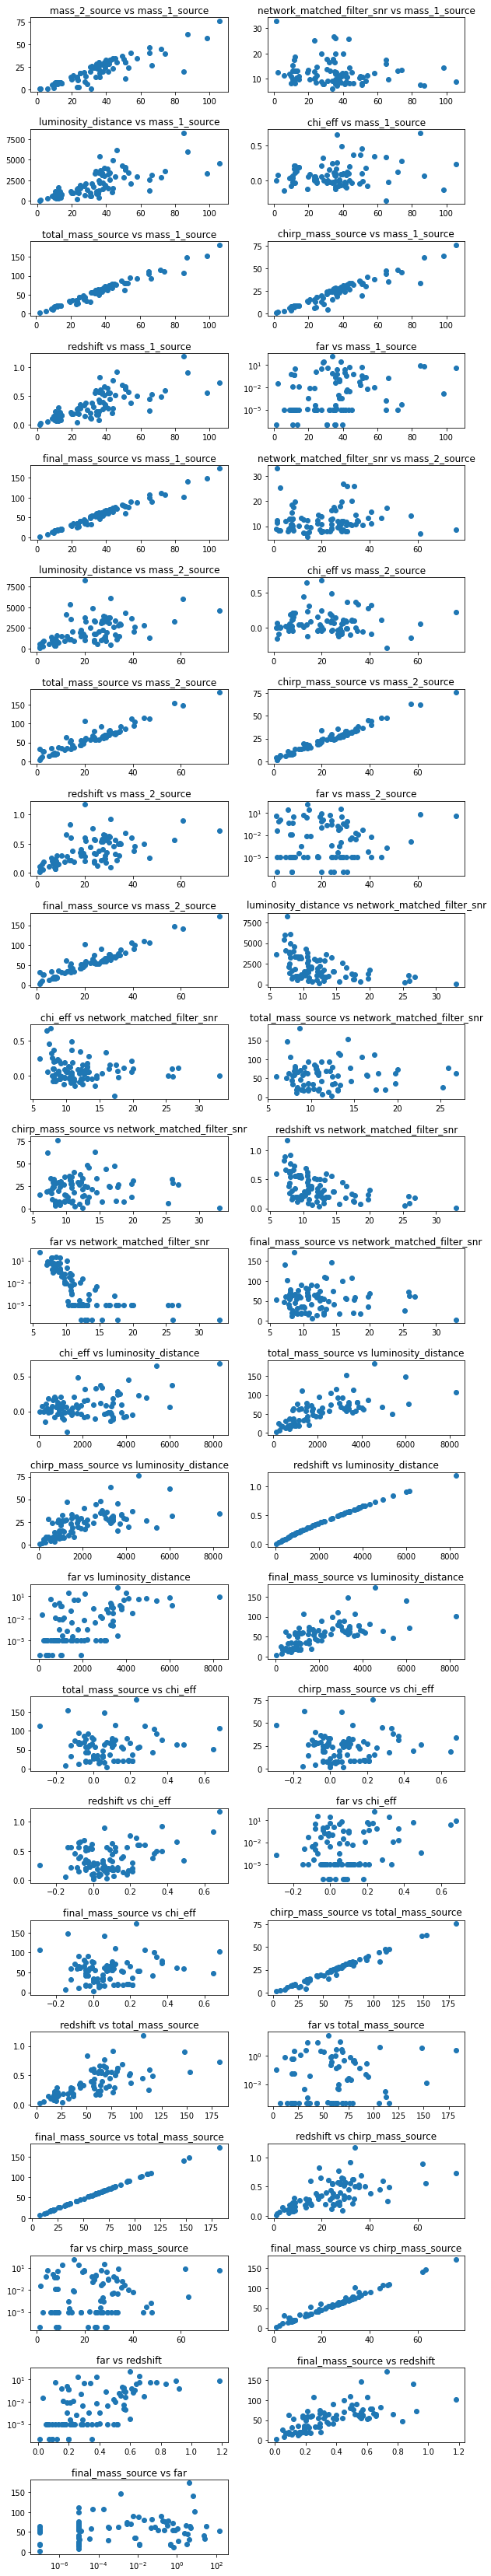

In [23]:

final.replace(np.NaN, 0)
to_graph = []
ligo = pd.read_csv("Ligo.csv")
for i in final.columns:
    for j in final.columns:
        if final[i][j] != 0:
            if (j, i) not in to_graph:
                if (i != j):
                    to_graph.append((i,j))
fig = plt.figure(figsize=(10,60))
for i in range(len(to_graph)):
    plt.subplot(23, 2, i+1)
    
    plt.scatter(ligo[to_graph[i][0]], ligo[to_graph[i][1]])
    plt.title(f'{to_graph[i][1]} vs {to_graph[i][0]}')
    if(to_graph[i][0] == "far"):
        plt.xscale("log")
    if(to_graph[i][1] == "far"):
        plt.yscale("log")
plt.subplots_adjust(hspace=0.5)


This low fidelity plotting is meant more to help me understand which correlations are worth looking further into. For example, far vs. final_mass_source appears to only be correlated due to a lack of data. I noticed that actually all the correlations involving far are hard to get useful data out of. I realized that it might look better on a log scale. It still shows odd data. Far was also used in the algorithmic search of GW signals and thus is also not particularly important to the rest of the merger's properties.

The most interesting of the correlations I noticed was the SNR vs. luminosity distance. As luminosity distance and redshift are directly correlated, it has ramifications for snr vs redshift as well. It appears to be inversely exponentially related.

Text(0.5, 0, 'SNR')

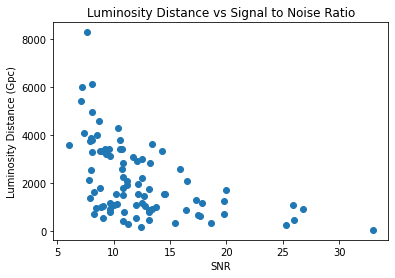

In [24]:
plt.scatter(ligo["network_matched_filter_snr"], ligo["luminosity_distance"])
x = ligo["network_matched_filter_snr"].to_numpy()
plt.title("Luminosity Distance vs Signal to Noise Ratio")
plt.ylabel(f'Luminosity Distance ({u.Gpc})')
plt.xlabel("SNR")


I will now use Machine Learning, as it was briefly taught in class, to perform a non linear regression on the data.

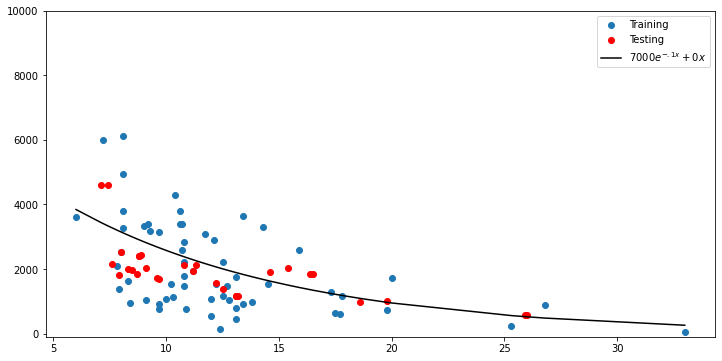

In [25]:
# From Lecture 28
def f_nonlinear(x,A=1,B=2,C=3,addnoise=False,noise=1.0,plot=False):
    if addnoise:
        noise = np.random.normal(scale=noise,size=len(x))
    else:
        noise = 0
    y = A*np.exp(-B*x) + C*x + noise

    if plot:
        plt.scatter(x,y)
    return y

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# x = ligo.loc[ligo[].notna()].to_numpy()
x = ligo.loc[ligo['luminosity_distance'].notna(), 'network_matched_filter_snr'].to_numpy()
y = ligo.loc[ligo['luminosity_distance'].notna(), 'luminosity_distance'].to_numpy()


x_train, x_test, y_train, y_test =\
 train_test_split(x, y, test_size=0.33, random_state=42)

regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(x_train.reshape(-1, 1), y_train)
pred = regr.predict(x_test.reshape(-1, 1))

plt.figure(figsize=(12,6))
plt.scatter(x_train,y_train,label="Training")
plt.scatter(x_test,pred,color='r',label="Testing")
x.sort()
plt.plot(x,f_nonlinear(x,A=7000,B=0.1, C=0),color='k', label=r"$7000e^{-.1x} + 0x$");

plt.ylim(-100, 10000)
plt.legend();


The fit for the data is irrelevant to the machine learning, but helps further cement that there is a non-linear correlation between SNR and luminosity distance. Through a vast amount of trial and error i was able to get a line that (somewhat) accurately represents the data. The meaning of such a correlation is that as luminosity distance increases the noise is more and more significant. This is an obvious conclusion, when thinking intuitively - The farther out the source of the signal is, the fainter and more interference the signal has. 

All of the pearsonR probabilities, after the final filtering (and even before that), are at extremely low values meaning that there is high likelyhood of correlation for most permutations of these remaining variables. However, some of them make more intuitive sense than others. 